In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotels = pd.read_excel("../data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Bar Chart and Histogram

* Build a histogram of lodging revenue with Seaborn. Filter your data to rows where LodgingRevenue is less than 1500. 
* Then, build a horizontal bar chart plotting the average room nights stayed for our top 5 countries by revenue ("DEU", "FRA", "PRT", "GBR", "ESP"). Change the color palette.

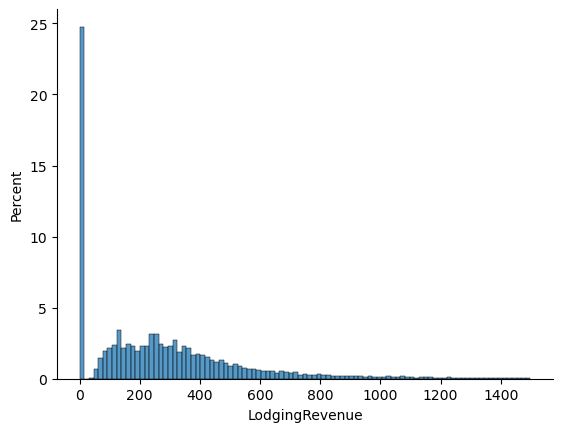

In [7]:
sns.histplot(
    x="LodgingRevenue", 
    stat='percent',
    data=hotels.query("LodgingRevenue < 1500"))

sns.despine()

In [27]:
hotels.loc[hotels["LodgingRevenue"] == 0].describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,20408.000000,19431.000000,20408.000000,20408.000000,20408.0,20408.000000,20408.000000,20408.0,20408.000000,20408.000000,...,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000
mean,59745.453156,39.509958,227.675813,1.046746,0.0,0.893267,0.000784,0.0,0.029547,0.085212,...,0.000784,0.003332,0.001617,0.025284,0.365004,0.159349,0.000245,0.002842,0.000245,0.090994
std,18444.889296,19.632375,226.324519,16.071189,0.0,43.534632,0.031296,0.0,0.320727,0.901228,...,0.027990,0.057629,0.040181,0.156991,0.481443,0.366010,0.015651,0.053236,0.015651,0.287607
min,3.000000,-7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51657.750000,25.000000,107.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62806.500000,41.000000,177.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72285.500000,55.000000,266.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,0.0,5105.500000,2.000000,0.0,34.000000,78.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# MarketSegment

hotels.loc[hotels["LodgingRevenue"] == 0, "DistributionChannel"].value_counts()

Travel Agent/Operator      16472
Direct                      3664
Corporate                    252
Electronic Distribution       20
Name: DistributionChannel, dtype: int64

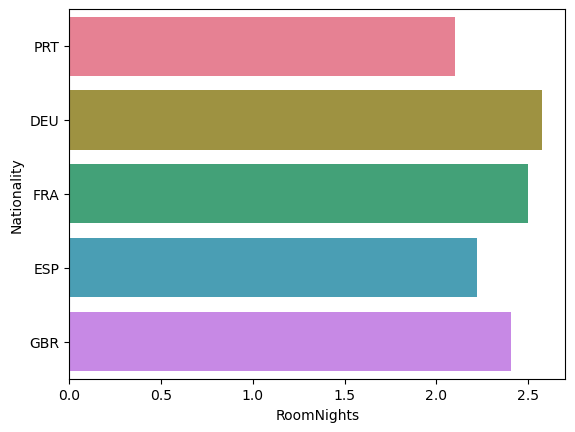

In [15]:
top5 = ['GBR', 'PRT', 'FRA', 'DEU', 'ESP']
top5_countries =  hotels.query("Nationality in @top5")

sns.barplot(
    x="RoomNights",
    y="Nationality",
    data=top5_countries,
    errorbar=None,
    palette="husl");



# Assignment 2: Box and Violin Plots

* Build a single boxplot of LodgingRevenue for our top 5 countries, where nightly revenue is less than 1500.
* Then, build a chart that has one violinplot for each country. Look at these plots both without a filter and with lodging revenue filtered to less than 1500.
* Finally, build a violinplot for the Age distribution for each of our top 5 countries.

<Axes: ylabel='LodgingRevenue'>

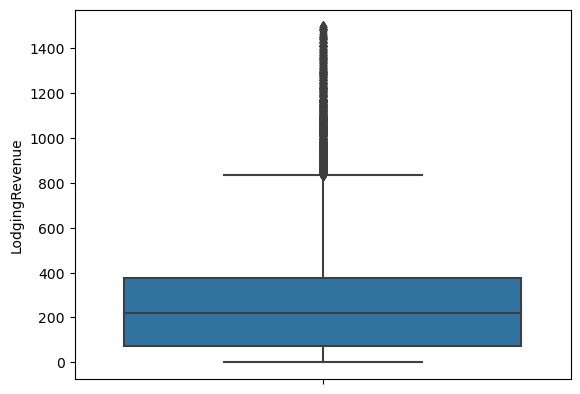

In [56]:
sns.boxplot(y="LodgingRevenue", data=top5_countries.query("LodgingRevenue< 1500"))


<Axes: xlabel='Nationality', ylabel='LodgingRevenue'>

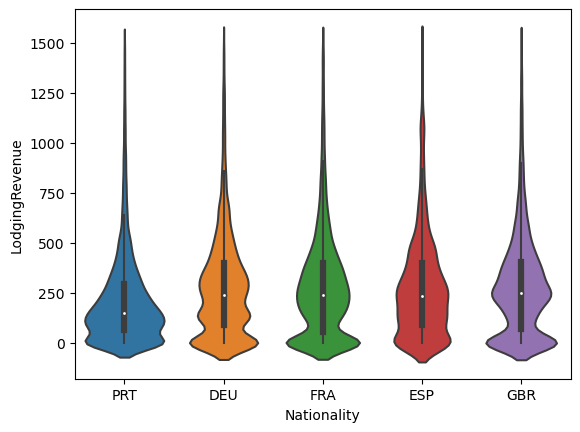

In [53]:
sns.violinplot(
    x="Nationality",
    y="LodgingRevenue",
    data=top5_countries.query("LodgingRevenue< 1500"))

<Axes: xlabel='Nationality', ylabel='Age'>

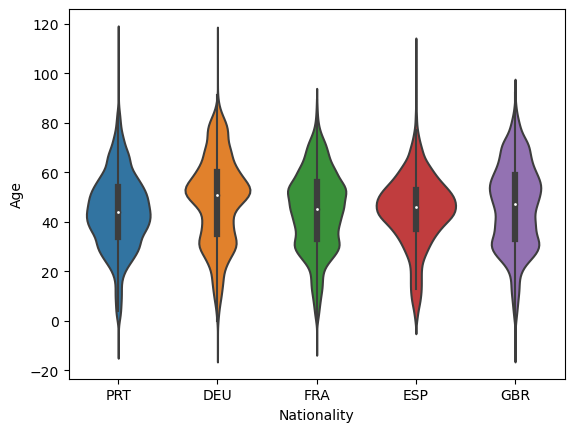

In [55]:
sns.violinplot(
    x="Nationality",
    y="Age",
    data=top5_countries)

# Assigment 3: Linear Relationship Plots

* Build a plot with a regression line comparing LodgingRevenue as y and RoomNights as x for rows in our top 5 countries.
* Then, build the same chart in bullet 1 but with a separate line for each of our top 5 countries. Which country appears to pay the most per night?
* Finally, build a pairplot with the columns: Age, LodgingRevenue, OtherRevenue, PersonsNights, RoomNights, and DaysSinceLastStay

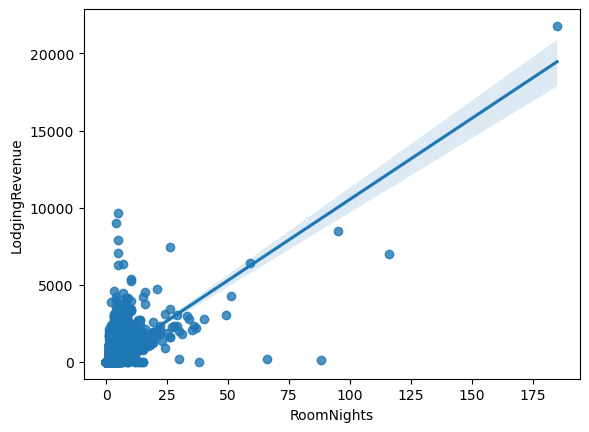

In [58]:
sns.regplot(x="RoomNights", y="LodgingRevenue", data=top5_countries);

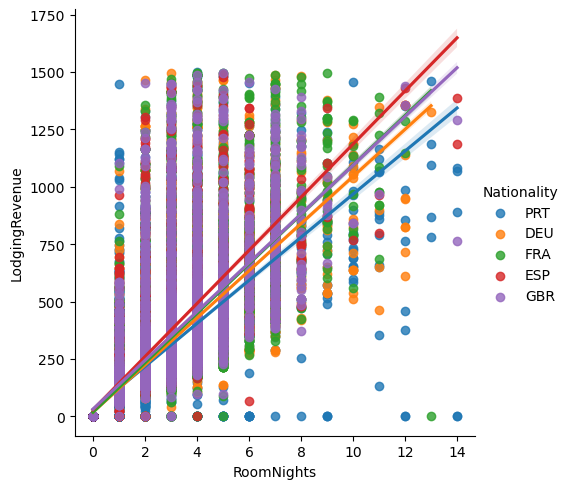

In [70]:
sns.lmplot(x="RoomNights",
           y="LodgingRevenue",
           hue="Nationality",
           data=top5_countries.query("LodgingRevenue <1500 and RoomNights<15"));

In [71]:
top5_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 83583
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    47809 non-null  int64  
 1   Nationality           47809 non-null  object 
 2   Age                   44031 non-null  float64
 3   DaysSinceCreation     47809 non-null  int64  
 4   AverageLeadTime       47809 non-null  int64  
 5   LodgingRevenue        47809 non-null  float64
 6   OtherRevenue          47809 non-null  float64
 7   BookingsCanceled      47809 non-null  int64  
 8   BookingsNoShowed      47809 non-null  int64  
 9   BookingsCheckedIn     47809 non-null  int64  
 10  PersonsNights         47809 non-null  int64  
 11  RoomNights            47809 non-null  int64  
 12  DaysSinceLastStay     47809 non-null  int64  
 13  DaysSinceFirstStay    47809 non-null  int64  
 14  DistributionChannel   47809 non-null  object 
 15  MarketSegment      

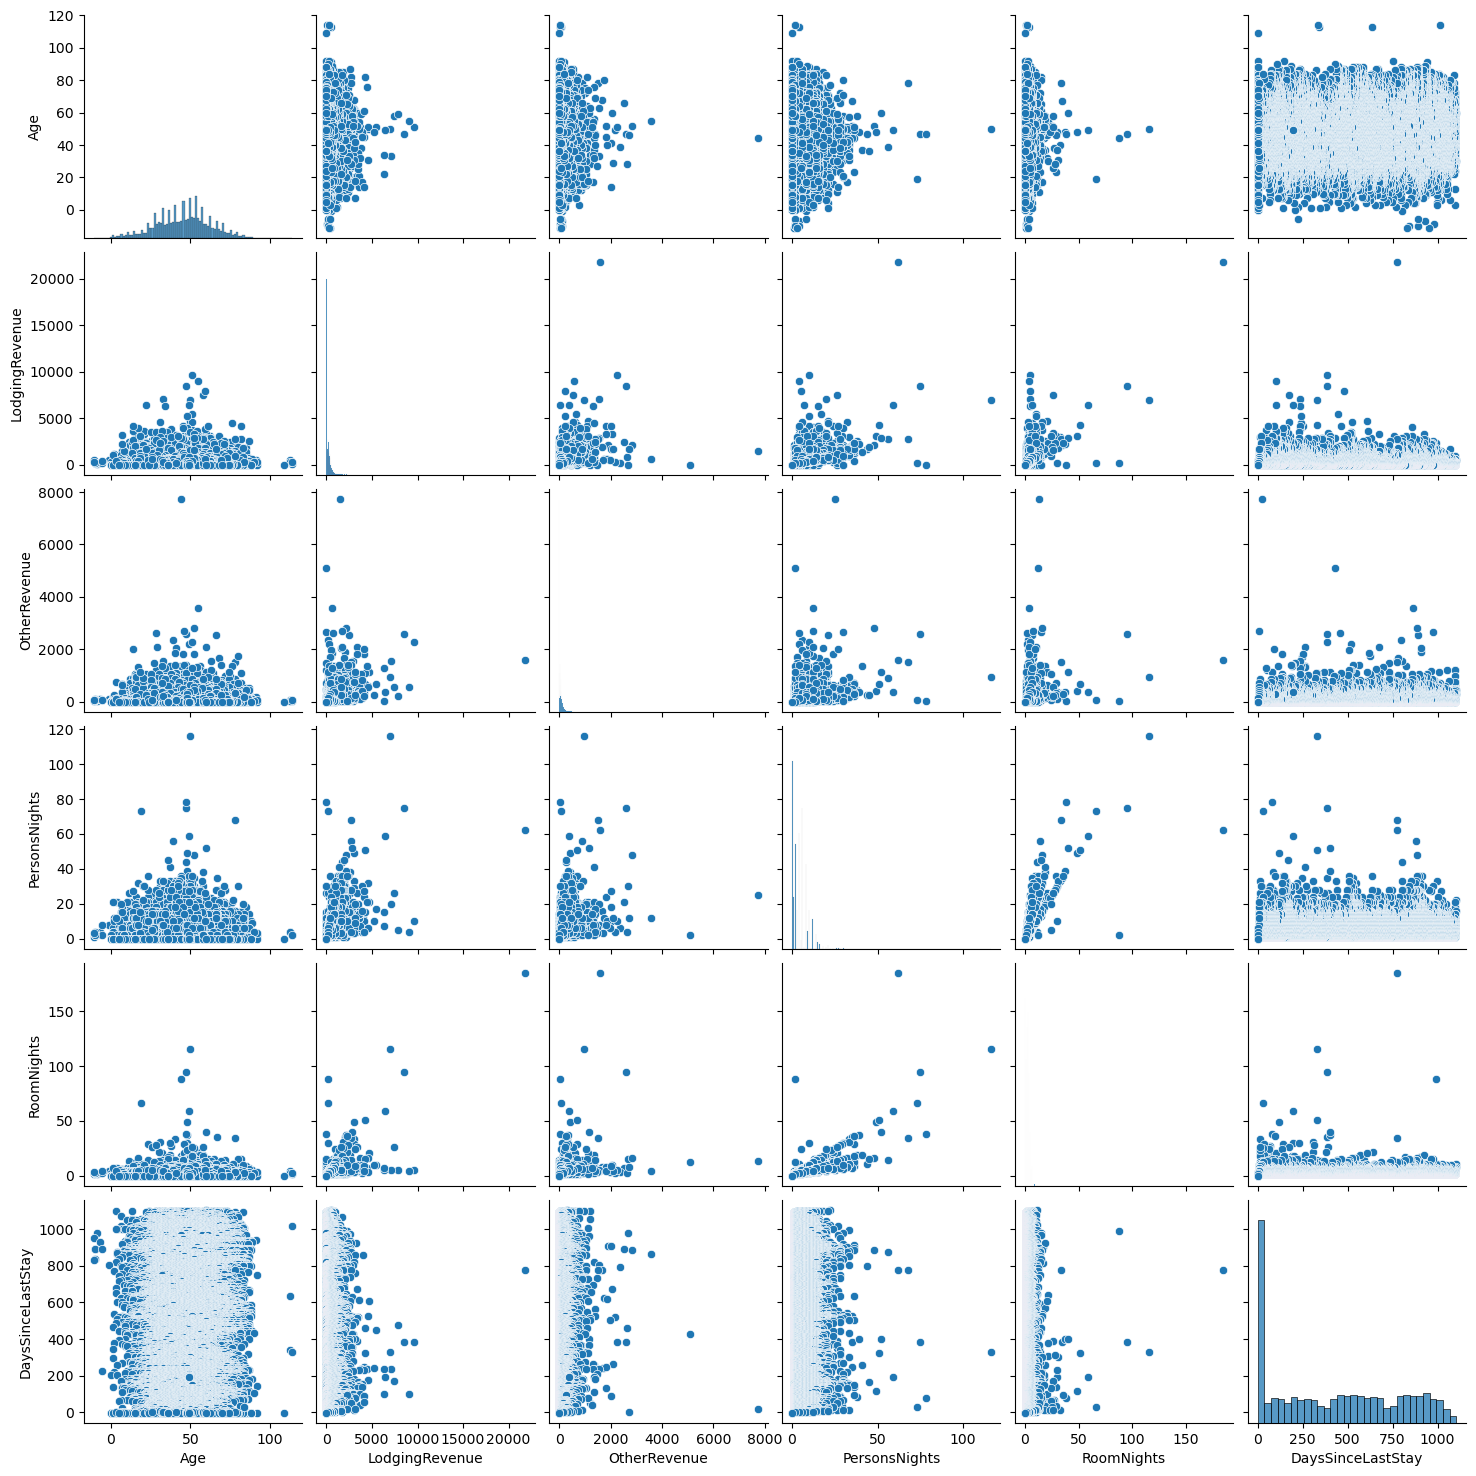

In [63]:
sns.pairplot(data=top5_countries.iloc[:, [2, 5, 6, 10, 11, 12]])

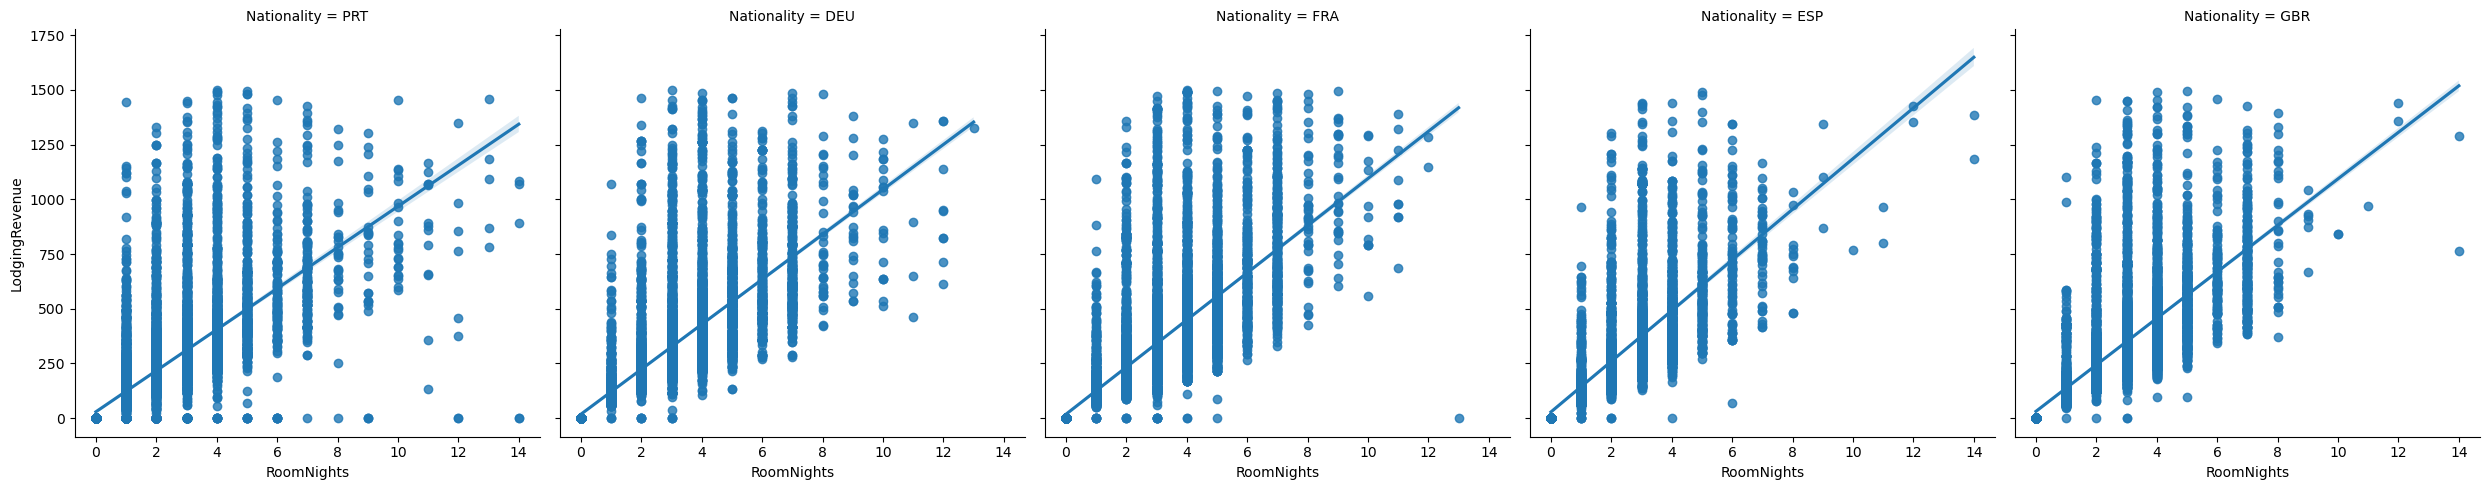

In [72]:
sns.lmplot(
    x="RoomNights",
    y="LodgingRevenue",
    col="Nationality",
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights< 15")
)

# Assignment 4 Heatmaps


* Using the top 5 countries DataFrame, Build a heatmap of Nationality as rows and MarketSegment as columns with the mean value of LodgingRevenue in each cell.

* Then, build a heatmap of the correlation matrix created when using the .corr() method on the hotels dataframe. Use the 'vlag' color palette.

In [21]:
hotel_pivot = (
    top5_countries
    .pivot_table(
        index="Nationality",
        columns="MarketSegment",
        values={"LodgingRevenue":"mean"}))

<Axes: xlabel='MarketSegment', ylabel='Nationality'>

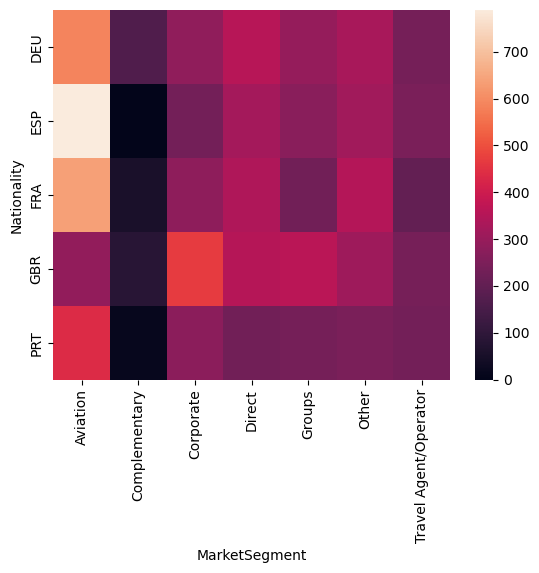

In [23]:
sns.heatmap(hotel_pivot.droplevel(0, axis=1))

C:\Users\BERK\AppData\Local\Temp\ipykernel_6760\2582410204.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hotels.iloc[:, :10].corr(),


<Axes: >

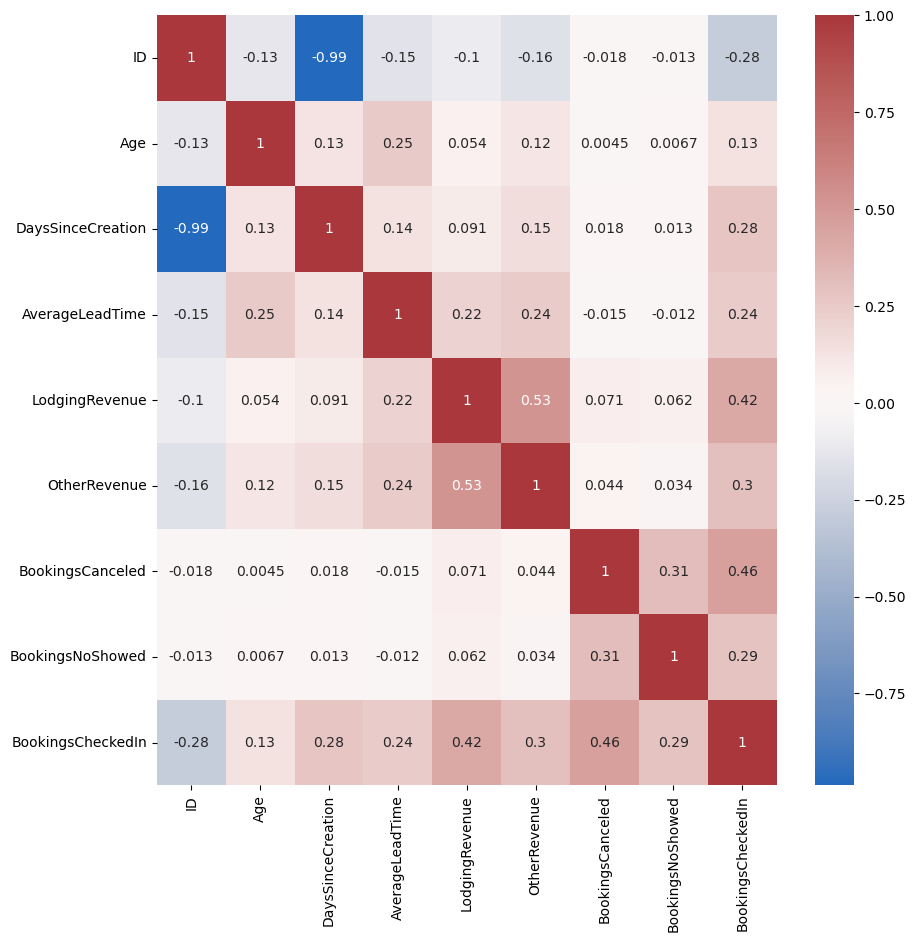

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    hotels.iloc[:, :10].corr(),
    annot=True,
    cmap="vlag")